# **Mushroom classification**

# *Importing Libraries*

In [5]:
import pandas as pd # useful for loading the dataset
import numpy as np # to perform array

# *Load Dateset*

In [7]:
dataset = pd.read_csv('mushroom_cleaned.csv')

# *Summarize Dataset*

In [8]:
print(dataset.shape)  # shape tells no. of rows and no. of columns
print(dataset.head(5))

(54035, 9)
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  


### *Segregate Dataset into X(Input/IndependentVariable) & Y(Output/DependentVariable)*

In [9]:
# Define features and target
X = dataset.drop('class', axis=1)
X.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
0,1372,2,2,10,3.807467,1545,11,1.804273
1,1461,2,2,10,3.807467,1557,11,1.804273
2,1371,2,2,10,3.612496,1566,11,1.804273
3,1261,6,2,10,3.787572,1566,11,1.804273
4,1305,6,2,10,3.711971,1464,11,0.943195


In [10]:
y = dataset['class']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

# *Visualize Dataset*

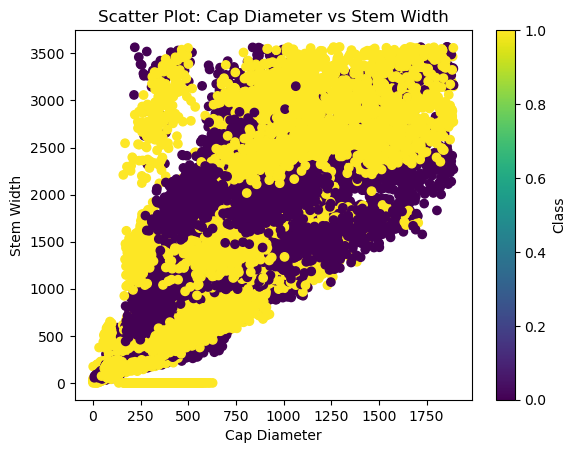

In [11]:
import matplotlib.pyplot as plt

# Example scatter plot for 'cap-diameter' vs 'stem-width'
plt.scatter(X['cap-diameter'], X['stem-width'], c=y, cmap='viridis')
plt.xlabel('Cap Diameter')
plt.ylabel('Stem Width')
plt.title('Scatter Plot: Cap Diameter vs Stem Width')
plt.colorbar(label='Class')
plt.show()

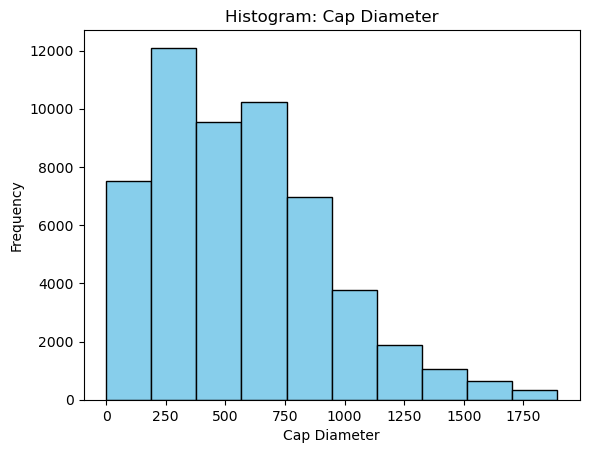

In [12]:
# Example histogram for 'cap-diameter'
plt.hist(X['cap-diameter'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Cap Diameter')
plt.ylabel('Frequency')
plt.title('Histogram: Cap Diameter')
plt.show()


### *Splitting Dataset into Test & Train*


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# *Preprocess the Data*


**Why do we scale data?**
We scale data to prevent the model from becoming biased. Scaling ensures that each feature contributes equally to the model's performance and prevents features with larger ranges from dominating the learning process.

We want our test data to be completely new or unseen by the model to ensure a fair evaluation of its performance.

### Detailed

1. **Preprocess the Data:**
   - **fit_transform method:**
     - It computes the mean and variance for each feature in the dataset.
     - It applies the calculated mean and variance to transform the features.
   - **transform method:**
     - It transforms the features using the previously computed mean and variance.

2. **Why do we scale data?**
   - **To prevent model bias:**
     - Without scaling, features with larger ranges can dominate those with smaller ranges, leading to biased model performance.
     - Scaling ensures each feature contributes equally, improving the model's learning process.
   - **To ensure fair evaluation:**
     - Scaling the training data allows the model to learn appropriately.
     - Applying the same scaling to test data ensures the model evaluates performance on new, unseen data fairly.



In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# *Training*

In [15]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model is used for binary classification like (yes/no) --(1/0)
# Define the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# *Predict*

In [16]:
y_pred = model.predict(X_test)

# *Evaluate*

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy of the Model: {0:.2f}%".format(accuracy_score(y_test, y_pred)*100))

print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy of the Model: 64.09%
Confusion Matrix:
[[3300 2796]
 [2055 5358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.54      0.58      6096
           1       0.66      0.72      0.69      7413

    accuracy                           0.64     13509
   macro avg       0.64      0.63      0.63     13509
weighted avg       0.64      0.64      0.64     13509



In [18]:
from sklearn.ensemble import RandomForestClassifier

modelRC = RandomForestClassifier()
modelRC.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
y_predRC = model.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy of the Model: {0}%".format(accuracy_score(y_test, y_predRC)*100))

Accuracy of the Model: 64.09060626249166%
